<a href="https://colab.research.google.com/github/thiyagi9/PythonPractises/blob/main/Suzlon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #library imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('max_columns', 140)
pd.set_option('precision', 3)

In [2]:
# Uploading "Working hours" from the working machine. This can be replaced by having the file in GDrive itself
from google.colab import files
f1 = files.upload()

Saving 06-06-2019-TO-04-06-2021SUZLONALLN.csv to 06-06-2019-TO-04-06-2021SUZLONALLN.csv


In [3]:
df=pd.read_csv('06-06-2019-TO-04-06-2021SUZLONALLN.csv',parse_dates=True, error_bad_lines=False)
df['Perc_Change']=((df['Close Price']-df['Prev Close'])/df['Prev Close'])*100
df['returns']=df['Close Price'].pct_change()

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Perc_Change,returns
count,496.000,496.000,496.000,496.000,496.000,496.000,496.000,4.960e+02,4.960e+02,496.000,496.000,495.000
mean,3.853,3.880,3.965,3.754,3.868,3.856,3.860,2.052e+07,9.034e+07,17753.544,0.160,0.002
std,1.366,1.376,1.404,1.339,1.373,1.373,1.372,2.550e+07,1.485e+08,18199.892,4.516,0.045
min,1.750,1.700,1.800,1.700,1.750,1.750,1.730,7.832e+05,2.820e+06,473.000,-12.500,-0.125
25%,2.650,2.700,2.750,2.550,2.650,2.650,2.658,7.783e+06,2.278e+07,6736.250,-2.778,-0.028
50%,3.600,3.650,3.700,3.500,3.650,3.600,3.625,1.236e+07,4.406e+07,12715.000,0.000,0.000
75%,4.850,4.862,5.000,4.700,4.862,4.850,4.845,2.275e+07,9.820e+07,22032.000,3.404,0.034
max,8.050,8.450,8.450,8.050,8.050,8.050,8.050,2.044e+08,1.502e+09,148508.000,22.388,0.224


In [7]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Perc_Change,returns
0,SUZLON,EQ,2019-06-06,5.45,5.45,5.65,5.1,5.30,5.35,5.39,49038653,2.642e+08,24761,8946635,18.24,-1.835,NaN
1,SUZLON,EQ,2019-06-07,5.35,5.35,5.45,5.1,5.25,5.20,5.27,29292725,1.543e+08,21971,9558650,32.63,-2.804,-0.028
2,SUZLON,EQ,2019-06-10,5.20,5.30,5.35,3.9,4.65,4.65,4.57,113780378,5.196e+08,62236,28758688,25.28,-10.577,-0.106
3,SUZLON,EQ,2019-06-11,4.65,4.65,4.95,4.1,4.85,4.80,4.60,66267875,3.047e+08,29388,15938281,24.05,3.226,0.032
4,SUZLON,EQ,2019-06-12,4.80,4.80,4.85,4.4,4.45,4.45,4.61,55604428,2.565e+08,30853,14977965,26.94,-7.292,-0.073


In [ ]:
df_max1 = df.sort_values('High Price', ascending=False).head(1)

df_maxQty=df.sort_values('Total Traded Quantity',ascending=False).head(10)

In [ ]:
df_maxQty

In [ ]:
df_perc=df[df['Date'].isin(['08-Jan-2021','11-Jan-2021'])]

df_perc


In [ ]:
df[df['Perc_Change']>0]

In [ ]:
df_perc['Perc_Change']=((df_perc['Close Price']-df_perc['Prev Close'])/df_perc['Prev Close'])*100

#(df['Close Price']/df['Prev Close'])*100

df_perc['Perc_Change']
#df_perc['Close Price']-df_perc['Prev Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


397   -4.969
398   -4.575
Name: Perc_Change, dtype: float64

In [8]:
df['log_returns']=np.log(1+df['returns'])

X=df[['Close Price','log_returns']]

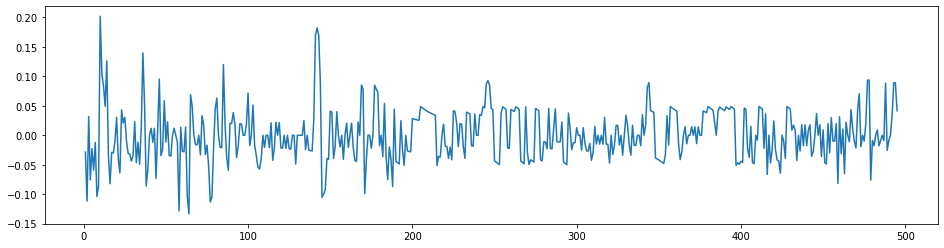

In [9]:
plt.figure(1,figsize=(16,4))
plt.plot(df['log_returns'])

In [10]:
X_bk=X.copy()
X.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X

,Close Price,log_returns
1,5.20,-0.028
2,4.65,-0.112
3,4.80,0.032
4,4.45,-0.076
5,4.35,-0.023
...,...,...
491,5.70,0.000
492,5.90,0.034
493,6.45,0.089
494,7.05,0.089


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler_new=MinMaxScaler(feature_range=(0,1)).fit(X)

X_scaled=scaler_new.transform(X)

In [14]:
X_scaled[:5]

array([[0.54761905, 0.31319012],
       [0.46031746, 0.06478756],
       [0.48412698, 0.49255294],
       [0.42857143, 0.17230871],
       [0.41269841, 0.33020561]])

In [15]:
y=[x[0] for x in X_scaled]

In [16]:
y[:5]

[0.5476190476190476,
 0.46031746031746035,
 0.4841269841269841,
 0.4285714285714286,
 0.41269841269841256]

In [17]:
split=int(len(X_scaled)*0.8)
split

396

In [18]:
X_train=X_scaled[:split]
X_test=X_scaled[split:len(X_scaled)]
y_train=y[:split]
y_test=y[split:len(y)]
#X_train

In [19]:
print(X_test.shape,X_train.shape)
print(len(y_train),len(y_test))

(99, 2) (396, 2)
396 99


In [20]:
assert len(X_train)==len(y_train)
assert len(X_test)==len(y_test)



In [21]:
n=3
Xtrain=[]
ytrain=[]
Xtest=[]
ytest=[]

for i in range(n,len(X_train)):
  Xtrain.append(X_train[i-n:i,:X_train.shape[1]])
  ytrain.append(y_train[i])

for j in range(n,len(X_test)):
  Xtest.append(X_test[j-n:j,:X_test.shape[1]])
  ytest.append(y_test[j])
  #print(X_train[i-n:i,:X_train.shape[1]])
  #print(i,n,i-n)
  


In [22]:
X.head()

,Close Price,log_returns
1,5.20,-0.028
2,4.65,-0.112
3,4.80,0.032
4,4.45,-0.076
5,4.35,-0.023


In [ ]:
Xtrain[100]

array([[0.17460317, 0.346109  ],
       [0.17460317, 0.39793831],
       [0.1984127 , 0.550798  ]])

In [ ]:
ytrain[0]

0.4285714285714286

In [23]:
val=np.array(ytrain[0])
val=np.c_[val,np.zeros(val.shape)]
scaler_new.inverse_transform(val)

array([[ 4.45      , -0.13353139]])

In [24]:
Xtrain,ytrain=(np.array(Xtrain),np.array(ytrain))
Xtrain=np.reshape(Xtrain,(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))

Xtest,ytest=(np.array(Xtest),np.array(ytest))
Xtest=np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))


In [25]:
print(Xtrain.shape)
print(ytrain.shape)
print("-----------")
print(Xtest.shape)
print(ytest.shape)



(393, 3, 2)
(393,)
-----------
(96, 3, 2)
(96,)


In [28]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dense(1))
#model.add(LSTM(units=50))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(Xtrain, ytrain, epochs=10,validation_data=(Xtest,ytest) ,batch_size=6, verbose=1)

Epoch 1/10
66/66 [==============================] - 18s 14ms/step - loss: 0.0916 - val_loss: 0.1760
Epoch 2/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.0915
Epoch 3/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.0696
Epoch 4/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0579
Epoch 5/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0460
Epoch 6/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.0375
Epoch 7/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0297
Epoch 8/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0203
Epoch 9/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0116
Epoch 10/10
66/66 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0077


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 4)                 112       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [38]:
trainPredictF=model.predict(Xtrain)
testPredictF=model.predict(Xtest)

In [39]:
trainPredictFi=np.c_[trainPredictF,np.zeros(trainPredictF.shape)]
testPredictFi=np.c_[testPredictF,np.zeros(testPredictF.shape)]

print(len(testPredictFi),len(trainPredictFi))

96 393


In [46]:
trainPredict_RM=scaler_new.inverse_transform(trainPredictFi)
trainPredict_RM=[x[0] for x in trainPredictFi]

testPredict_RM=scaler_new.inverse_transform(testPredictFi)
testPredict_RM=[x[0] for x in testPredictFi]


In [42]:
from sklearn.metrics import mean_squared_error 

In [47]:
trainScore=mean_squared_error([x[0][0] for x in Xtrain],trainPredict_RM,squared=False)
print('Train Score : %2f RMSE'%(trainScore))
testScore=mean_squared_error([x[0][0] for x in Xtest],testPredict_RM,squared=False)
print('Test Score : %2f RMSE'%(testScore))

Train Score : 0.059859 RMSE
Test Score : 0.096625 RMSE


In [61]:
tP=np.array(testPredict_RM)

#type(X_test)
valid_new=Xtest

#valid_new['Pred']=testPredict_RM
print(type(valid_new),len(valid_new))
#print(type(tP),len(tP))
#print(valid_new[:])


<class 'numpy.ndarray'> 96


In [64]:
print(type(testPredict_RM),
type(trainPredict_RM))

<class 'list'> <class 'list'>


In [49]:

valid = np.append(valid_new, tP)

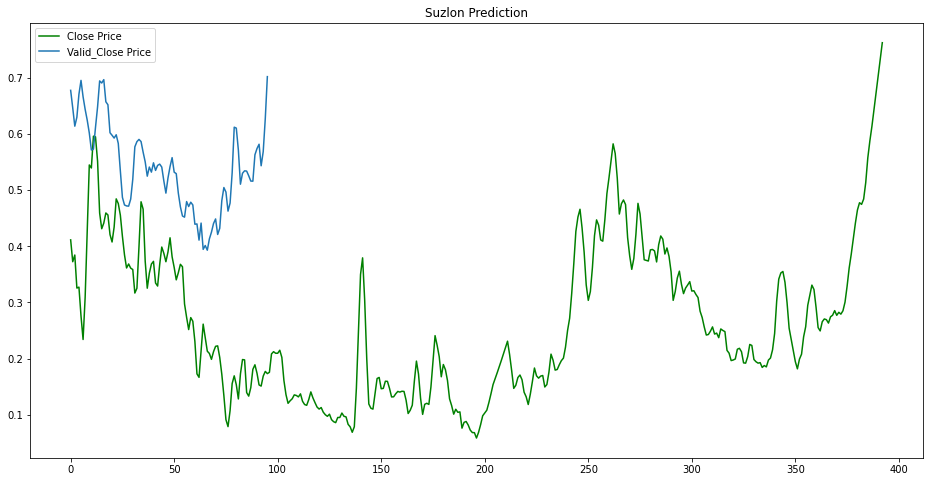

In [56]:


#for plotting
plt.figure(figsize=(16,8))
#train = Xtrain[0]
#valid = X_test
#valid['Predictions'] = tP
plt.plot(trainPredict_RM,'g')
plt.plot(testPredict_RM)

plt.title('Suzlon Prediction')
plt.legend(['Close Price','Valid_Close Price','Predict Price'])

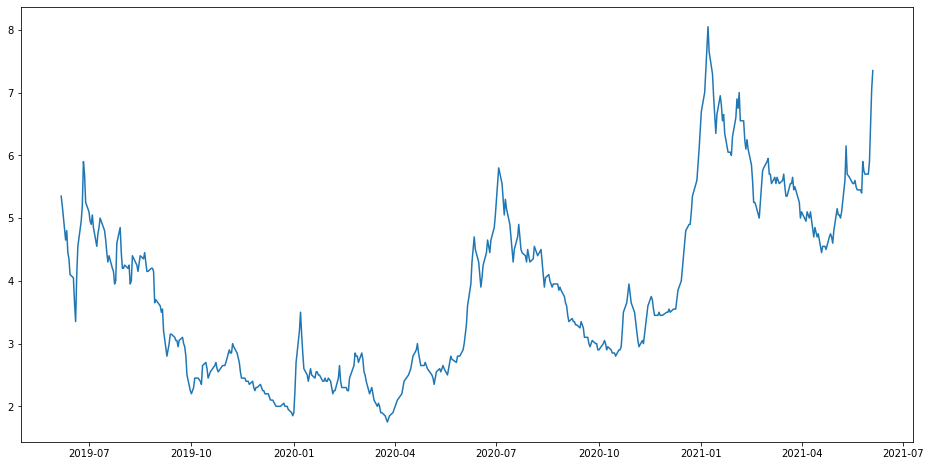

In [ ]:

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close Price'], label='Close Price history')

In [65]:
s=df.shape
size=s[0]*.75
size=int(size)

In [69]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close Price'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#size=size.astype(int)
train = dataset[0:size,:]
valid = dataset[size:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=6, verbose=1)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/100
52/52 [==============================] - 4s 29ms/step - loss: 0.0181
Epoch 2/100
52/52 [==============================] - 2s 29ms/step - loss: 0.0045
Epoch 3/100
52/52 [==============================] - 2s 29ms/step - loss: 0.0032
Epoch 4/100
52/52 [==============================] - 2s 30ms/step - loss: 0.0027
Epoch 5/100
52/52 [==============================] - 2s 29ms/step - loss: 0.0030
Epoch 6/100
52/52 [==============================] - 2s 30ms/step - loss: 0.0029
Epoch 7/100
52/52 [==============================] - 2s 29ms/step - loss: 0.0028
Epoch 8/100
52/52 [==============================] - 2s 30ms/step - loss: 0.0019
Epoch 9/100
52/52 [==============================] - 2s 29ms/step - loss: 0.0023
Epoch 10/100
52/52 [==============================] - 2s 29ms/step - loss: 0.0019
Epoch 11/100
52/52 [==============================] - 2s 30ms/step - loss: 0.0016
Epoch 12/100
52/52 [==============================] - 2s 30ms/step - loss: 0.0015
Epoch 13/100
52/52 [=====

In [70]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.24380221451619358

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


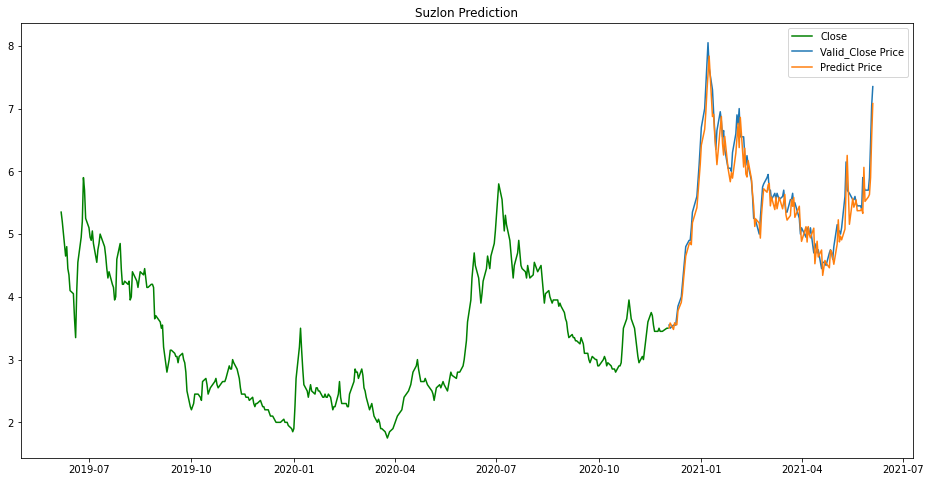

In [71]:
#for plotting
plt.figure(figsize=(16,8))
train = new_data[:size]
valid = new_data[size:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],'g')
plt.plot(valid[['Close','Predictions']]
)
plt.title('Suzlon Prediction')
plt.legend(['Close','Valid_Close Price','Predict Price'])